In [1]:
from ete3 import Tree, TreeStyle, TextFace, add_face_to_node, SeqMotifFace, NodeStyle, faces, ImgFace, CircleFace, AttrFace

def get_domains(domains):
    
    pos_dict = {'RBD_A' : 0, 'RBD_C' : 1, 'RBD_B' : 2, 'NMD' : 3, 'RBD_D' : 4}

    
    domain_list = [
        # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
        [0,  60, "[]", None, 20, "black", "rgradient:green", "arial|3|black|RBD_A"],
        [70, 130, "[]", None, 20, "black", "rgradient:blue", "arial|3|black|RBD_C"],
        [140, 200, "[]", None, 20, "black", "rgradient:orange", "arial|3|black|RBD_B"],
        [210, 270, "[]", None, 20, "black", "rgradient:purple", "arial|3|black|NMD"],
        [280, 340, "[]", None, 20, "black", "rgradient:gray", "arial|3|black|RBD_D"]]
    
    
    for k,v in pos_dict.items():
        if k not in domains:
            domain_list[v][6] = 'white'
            domain_list[v][7] = "arial|3|black|"
            
    return domain_list




def get_example_tree(tree, attribute_dict, colour_dict, region_dict):
            
            colour = None

            # Label all internal nodes
            edge = 0
            for node in tree.traverse():
                if not node.is_leaf():
                    node.name = "N%d" % edge
                    edge += 1

            # Get the colours for each extant genome
            for node in tree.iter_descendants("postorder"):
                if node.is_leaf():
                    spaced_name = " ".join(node.name.split("_")[3:5])
                    if spaced_name in attribute_dict.keys():  # If we have a match in the attribute dict
                        colour = colour_dict[attribute_dict[spaced_name]]  # Get the associated colour for this attribute
                        
                    if node.name == "Serratia_entomophila" or node.name == "Yersinia_entomophaga":
                        nameFace = TextFace("  " + spaced_name, fsize=15, fgcolor='red')
                        
                    else:
                        nameFace = TextFace("  " + spaced_name, fsize=15, fgcolor='black')

                    node.add_face(nameFace, column=0)

                else:
                    colour = 'black'
                    
                if colour == None:
                    colour = 'black'

                nstyle = NodeStyle()
                nstyle["fgcolor"] = colour
                nstyle["size"] = 20
                node.set_style(nstyle)
                
                
#                 if node.is_leaf():

#                     box_domains = get_domains([x for x in region_dict[node.name].keys()])
                    
#                     seqFace = SeqMotifFace(seq=None, motifs=box_domains, gap_format="line")
#                     node.add_face(seqFace, 0, "aligned")
                
            
                ts = TreeStyle()
                ts.show_leaf_name = False
                ts.branch_vertical_margin = 10

                # if custom_layout:
                #     ts.layout_fn = layout
                #     ts.show_leaf_name = False

            # ts.mode = "c"
            ts.root_opening_factor = 1

            return tree, ts

def colour_tips(tree, attribute_dict, colour_dict, region_dict, outpath=None, custom_layout=False):

    

    tree, ts = get_example_tree(tree, attribute_dict, colour_dict, region_dict)
    if outpath:
        tree.render(outpath, dpi=300, tree_style=ts)

    return tree, ts

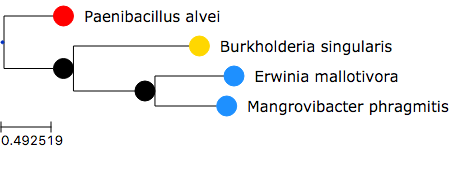

In [23]:
from src.attributes import attribute_dict
region_dict = {}
    # Define the colours to use for each type - list of colours are here - http://etetoolkit.org/docs/latest/reference/reference_treeview.html
colour_dict = {'type1_single' :'dodgerblue', 'type2b_single': 'gold', 'type2a_single':'green', 'multiple' : 'red', 'unknown' : 'black'}


tree = Tree('(NZ_AMBZ01000025.1_info_Paenibacillus_alvei_TcdA1_expanded_position_1274632_1281550_backward:0.487241,(NZ_LOWA01000060.1_info_Burkholderia_singularis_A1_expanded_position_1552165_1555588_forward_A2_expanded_position_1555683_1560465_forward:1.14208,(NZ_JFHN01000075.1_info_Erwinia_mallotivora_TcdA1_expanded_position_496896_504417_forward:0.680082,NZ_LYRP01000050.1_info_Mangrovibacter_phragmitis_TcdA1_expanded_position_1201065_1208661_backward:0.60826):0.605745):0.487241);')
# Save the coloured tips to file
output_tree, ts = colour_tips(tree, attribute_dict, colour_dict, region_dict, outpath= 'tree_test.png', custom_layout=False)

output_tree.render("%%inline", dpi=300, tree_style=ts)

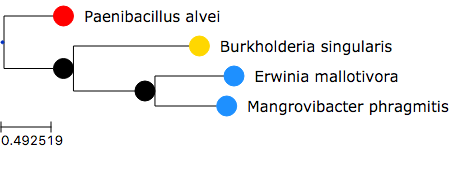

In [24]:
from src.attributes import attribute_dict
region_dict = {}
    # Define the colours to use for each type - list of colours are here - http://etetoolkit.org/docs/latest/reference/reference_treeview.html
colour_dict = {'type1_single' :'dodgerblue', 'type2b_single': 'gold', 'type2a_single':'green', 'multiple' : 'red', 'unknown' : 'black'}


tree = Tree('(NZ_AMBZ01000025.1_info_Paenibacillus_alvei_TcdA1_expanded_position_1274632_1281550_backward:0.487241,(NZ_LOWA01000060.1_info_Burkholderia_singularis_A1_expanded_position_1552165_1555588_forward_A2_expanded_position_1555683_1560465_forward:1.14208,(NZ_JFHN01000075.1_info_Erwinia_mallotivora_TcdA1_expanded_position_496896_504417_forward:0.680082,NZ_LYRP01000050.1_info_Mangrovibacter_phragmitis_TcdA1_expanded_position_1201065_1208661_backward:0.60826):0.605745):0.487241);')
# Save the coloured tips to file
output_tree, ts = colour_tips(tree, attribute_dict, colour_dict, region_dict, outpath= 'tree_test.png', custom_layout=False)

output_tree.render("%%inline", dpi=300, tree_style=ts)